<a href="https://colab.research.google.com/github/maalik19/Model_CNN/blob/main/hat_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Importer Dataset a partir Kaggle API

In [2]:
! pip install -q kaggle

In [3]:
! mkdir ~/.kaggle/

In [4]:
! cp '/content/drive/MyDrive/kaggle/kaggle.json' ~/.kaggle/

In [5]:
#donner droit
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets list

ref                                                    title                                        size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------  ------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
thedrcat/daigt-v2-train-dataset                        DAIGT V2 Train Dataset                       29MB  2023-11-16 01:38:36           2886        244  1.0              
thedevastator/global-video-game-sales-and-reviews      Global Video Game Sales and Reviews          56KB  2023-12-20 06:36:51           1041         30  1.0              
bhavikjikadara/car-price-prediction-dataset            Car Price Prediction Dataset                  4KB  2023-12-23 07:07:54           1080         31  0.9411765        
muhammadbinimran/housing-price-prediction-data         Housing Price Prediction Data               763KB  2023-11-21 17:56:32          12391     

In [7]:
! kaggle datasets download -d andrewmvd/hard-hat-detection


 99% 1.21G/1.22G [00:12<00:00, 125MB/s]
100% 1.22G/1.22G [00:12<00:00, 109MB/s]


In [8]:
import zipfile

path = "/content/hard-hat-detection.zip"

with zipfile.ZipFile(path, "r") as zip_ref:
    zip_ref.extractall("/content/DATASET")

##Preparation Dataset

In [9]:
import xml.etree.ElementTree as ET
import glob
import os
import json


def xml_to_yolo_bbox(bbox, w, h):
    # xmin, ymin, xmax, ymax
    x_center = ((bbox[2] + bbox[0]) / 2) / w
    y_center = ((bbox[3] + bbox[1]) / 2) / h
    width = (bbox[2] - bbox[0]) / w
    height = (bbox[3] - bbox[1]) / h
    return [x_center, y_center, width, height]


def yolo_to_xml_bbox(bbox, w, h):
    # x_center, y_center width heigth
    w_half_len = (bbox[2] * w) / 2
    h_half_len = (bbox[3] * h) / 2
    xmin = int((bbox[0] * w) - w_half_len)
    ymin = int((bbox[1] * h) - h_half_len)
    xmax = int((bbox[0] * w) + w_half_len)
    ymax = int((bbox[1] * h) + h_half_len)
    return [xmin, ymin, xmax, ymax]


classes = []
input_dir = "/content/DATASET/annotations"
output_dir = "/content/DATASET/labels/"
image_dir = "/content/DATASET/images"

# Créer le dossier des labels
if not os.path.isdir(output_dir):
    os.mkdir(output_dir)


files = glob.glob(os.path.join(input_dir, '*.xml'))

for fil in files:
    basename = os.path.basename(fil)
    filename = os.path.splitext(basename)[0]
    if not os.path.exists(os.path.join(image_dir, f"{filename}.png")):
        print(f"{filename} image does not exist!")
        continue

    result = []


    tree = ET.parse(fil)
    root = tree.getroot()
    width = int(root.find("size").find("width").text)
    height = int(root.find("size").find("height").text)

    for obj in root.findall('object'):
        label = obj.find("name").text
        # Vérifier les nouvelles classes et les ajouter à la liste
        if label not in classes:
            classes.append(label)
        index = classes.index(label)
        pil_bbox = [int(x.text) for x in obj.find("bndbox")]
        yolo_bbox = xml_to_yolo_bbox(pil_bbox, width, height)
        # Convertir les données en chaîne
        bbox_string = " ".join([str(x) for x in yolo_bbox])
        result.append(f"{index} {bbox_string}")

    if result:

        with open(os.path.join(output_dir, f"{filename}.txt"), "w", encoding="utf-8") as f:
            f.write("\n".join(result))


print("XML to YOLO Format Done!!")


XML to YOLO Format Done!!


In [10]:
print("Classes  :")
for idx, class_name in enumerate(classes):
    print(f"{idx + 1}. {class_name}")

Classes  :
1. helmet
2. head
3. person


In [14]:
import yaml


input_file_path = '/content/dataset_info.txt'


with open(input_file_path, 'r', encoding='utf-8') as file:
    content = file.read()

# Supprimer les commentaires du contenu
content_lines = [line for line in content.split('\n') if not line.strip().startswith('#')]

# Reconstruire le contenu au format YAML
yaml_content = '\n'.join(content_lines)

# Chemin d'accès au fichier de sortie YAML
output_file_path = '/content/dataset_info.yaml'

# Enregistrement
with open(output_file_path, 'w', encoding='utf-8') as file:
    file.write(yaml_content)

print(f"Le fichier a été converti avec succès en format YAML et enregistré sous : {output_file_path}")


Le fichier a été converti avec succès en format YAML et enregistré sous : /content/dataset_info.yaml


##Exploration dataset

 shape  : (415, 416, 3)


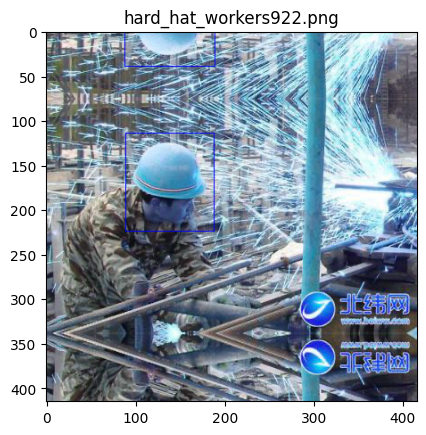

 shape  : (416, 416, 3)


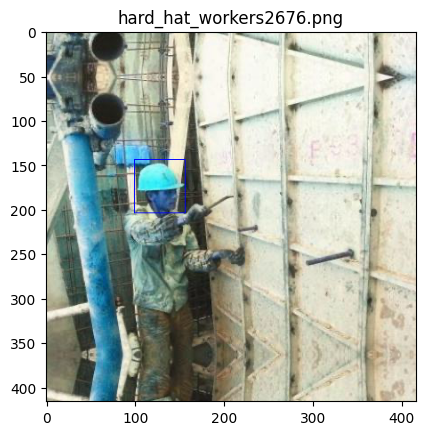

 shape  : (415, 416, 3)


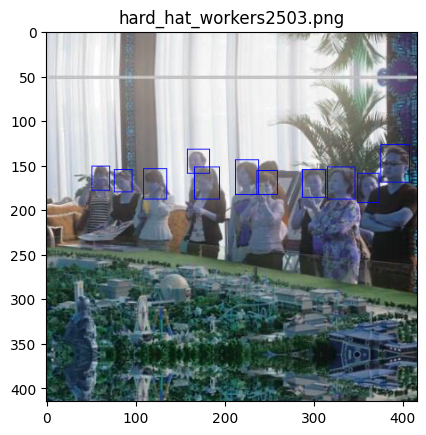

 shape  : (416, 416, 3)


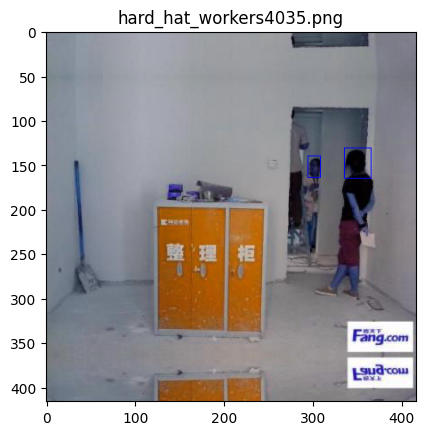

 shape  : (415, 416, 3)


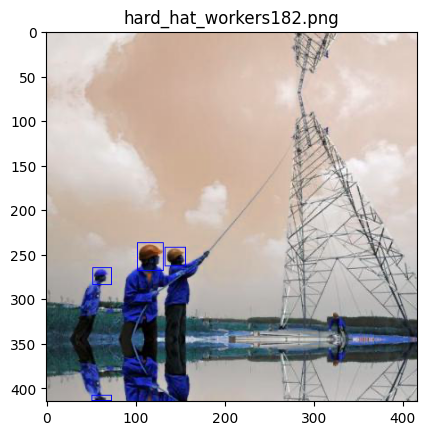

 shape  : (416, 416, 3)


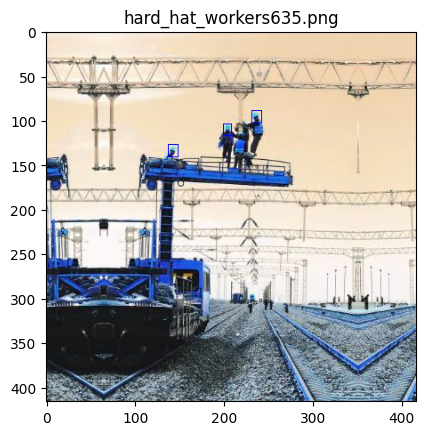

 shape  : (415, 416, 3)


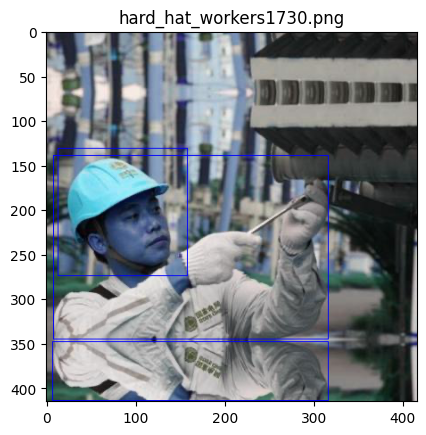

 shape  : (416, 416, 3)


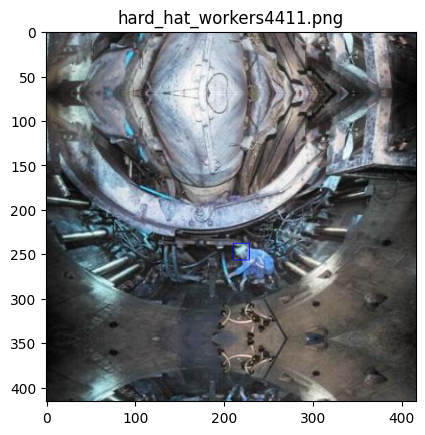

 shape  : (415, 416, 3)


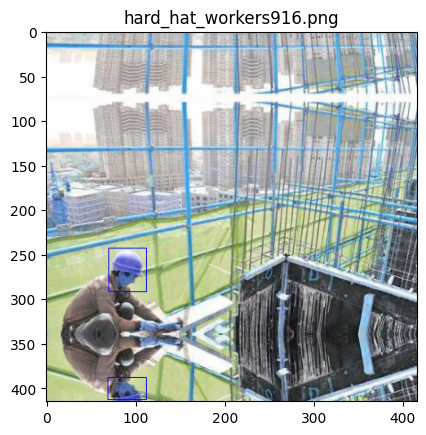

In [11]:
import cv2
import matplotlib.pyplot as plt
import os


image_dir = "/content/DATASET/images"
labels_dir = "/content/DATASET/labels"


label_files = os.listdir(labels_dir)[:9]

for label_file in label_files:

    img_name = os.path.splitext(label_file)[0] + ".png"
    img_path = os.path.join(image_dir, img_name)
    img = cv2.imread(img_path)
    dh, dw, _ = img.shape


    print(f" shape  : {img.shape}")


    label_path = os.path.join(labels_dir, label_file)
    with open(label_path, 'r') as fl:
        data = fl.readlines()


    for dt in data:
        _, x, y, w, h = map(float, dt.split(' '))
        l = int((x - w / 2) * dw)
        r = int((x + w / 2) * dw)
        t = int((y - h / 2) * dh)
        b = int((y + h / 2) * dh)

        if l < 0:
            l = 0
        if r > dw - 1:
            r = dw - 1
        if t < 0:
            t = 0
        if b > dh - 1:
            b = dh - 1

        cv2.rectangle(img, (l, t), (r, b), (0, 0, 255), 1)


    plt.imshow(img)
    plt.title(img_name)
    plt.show()


In [12]:
from sklearn.model_selection import train_test_split
import shutil
import os

IMAGES_PATH = "/content/DATASET/images"
LABELS_PATH = "/content/DATASET/labels"


labels = os.listdir(LABELS_PATH)

# Split data
train, test = train_test_split(labels, test_size=0.15, shuffle=True)
valid, test = train_test_split(test, test_size=0.2)

print(f"train: {len(train)}; valid: {len(valid)}; test: {len(test)}")

os.makedirs("test/images")
os.makedirs("test/labels")
os.makedirs("train/images")
os.makedirs("train/labels")
os.makedirs("valid/images")
os.makedirs("valid/labels")

def move_files_to_dir(files, dirname):
    for label_filename in files:
        image_filename = f"{label_filename[:-4]}.png"
        shutil.copy(f"{IMAGES_PATH}/{image_filename}", f"{dirname}/images/{image_filename}")
        shutil.copy(f"{LABELS_PATH}/{label_filename}", f"{dirname}/labels/{label_filename}")


move_files_to_dir(train, "train")
move_files_to_dir(test, "test")
move_files_to_dir(valid, "valid")

print("Train Test Split Done!!")

train: 4250; valid: 600; test: 150
Train Test Split Done!!


In [13]:
! pip install ultralytics


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 663.2/663.2 kB 3.9 MB/s eta 0:00:00


##YOLOv8m => Object Detection

In [15]:
import matplotlib.pyplot as plt
from ultralytics import YOLO

model = YOLO('yolov8m.pt')



100%|██████████| 49.7M/49.7M [00:00<00:00, 203MB/s]


##GPU

In [16]:
import torch

# GPU
if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

print(device)




cuda


In [17]:
# Move model to GPU
model = model.to(device)

##Train

In [18]:
txt_config = '/content/dataset_info.yaml'
batch_size=32
epochs = 30
history = model.train(data=txt_config, epochs=epochs, batch=batch_size,device=device,conf=0.25)

engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/dataset_info.yaml, epochs=30, time=None, patience=50, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=0.25, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, si

100%|██████████| 755k/755k [00:00<00:00, 17.3MB/s]


Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

100%|██████████| 6.23M/6.23M [00:00<00:00, 79.1MB/s]


WARNING ⚠️ NMS time limit 0.550s exceeded
AMP: checks passed ✅


train: Scanning /content/train/labels... 4250 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4250/4250 [00:04<00:00, 1027.96it/s]


train: New cache created: /content/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/valid/labels... 600 images, 0 backgrounds, 0 corrupt: 100%|██████████| 600/600 [00:01<00:00, 488.39it/s]


val: New cache created: /content/valid/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      14.2G      1.481      1.364      1.294        166        640: 100%|██████████| 133/133 [02:29<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:11<00:00,  1.18s/it]

                   all        600       2871      0.515      0.458      0.503      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30        14G      1.434     0.9735      1.283        198        640: 100%|██████████| 133/133 [02:41<00:00,  1.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:11<00:00,  1.16s/it]

                   all        600       2871      0.579      0.506      0.583      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      14.3G      1.411     0.9419      1.279        185        640: 100%|██████████| 133/133 [02:23<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:11<00:00,  1.12s/it]

                   all        600       2871      0.527      0.418      0.507      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      14.1G      1.394     0.9311      1.271        242        640: 100%|██████████| 133/133 [02:24<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:11<00:00,  1.16s/it]

                   all        600       2871      0.599      0.527      0.594      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      14.3G      1.371     0.8894      1.258        146        640: 100%|██████████| 133/133 [02:22<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:11<00:00,  1.16s/it]

                   all        600       2871      0.603      0.536      0.596       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30        14G      1.352     0.8414      1.238        182        640: 100%|██████████| 133/133 [02:22<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:10<00:00,  1.07s/it]

                   all        600       2871       0.59      0.554      0.606      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      14.3G      1.327     0.8135      1.232        218        640: 100%|██████████| 133/133 [02:21<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:11<00:00,  1.14s/it]

                   all        600       2871       0.62      0.566      0.619      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      13.7G       1.32     0.7945      1.225        173        640: 100%|██████████| 133/133 [02:22<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:11<00:00,  1.16s/it]

                   all        600       2871       0.61      0.578      0.616      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      14.5G      1.297     0.7869       1.21        178        640: 100%|██████████| 133/133 [02:23<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:11<00:00,  1.14s/it]

                   all        600       2871      0.618      0.567      0.615      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      14.4G      1.288     0.7592      1.204        187        640: 100%|██████████| 133/133 [02:21<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:10<00:00,  1.08s/it]

                   all        600       2871      0.617      0.584      0.625      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      14.4G      1.264     0.7457      1.194        152        640: 100%|██████████| 133/133 [02:21<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:11<00:00,  1.11s/it]

                   all        600       2871      0.614      0.561      0.612      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30        14G      1.258     0.7353      1.188        224        640: 100%|██████████| 133/133 [02:21<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:11<00:00,  1.14s/it]

                   all        600       2871      0.618      0.593      0.629      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      14.1G      1.251     0.7177      1.184        216        640: 100%|██████████| 133/133 [02:21<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:10<00:00,  1.08s/it]

                   all        600       2871       0.63      0.583      0.629      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      14.2G      1.248     0.7019      1.179        166        640: 100%|██████████| 133/133 [02:23<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:11<00:00,  1.16s/it]

                   all        600       2871      0.614      0.573      0.621      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      14.4G      1.231     0.6981      1.173        215        640: 100%|██████████| 133/133 [02:21<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:10<00:00,  1.09s/it]

                   all        600       2871      0.624      0.587      0.628      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30        14G      1.222     0.6811      1.166        177        640: 100%|██████████| 133/133 [02:21<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:11<00:00,  1.14s/it]

                   all        600       2871      0.628       0.59      0.627      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      14.4G      1.208     0.6699      1.168        216        640: 100%|██████████| 133/133 [02:22<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:11<00:00,  1.11s/it]

                   all        600       2871      0.627      0.586      0.628      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      14.3G      1.199     0.6639      1.165        174        640: 100%|██████████| 133/133 [02:23<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:11<00:00,  1.12s/it]

                   all        600       2871      0.637      0.585      0.629      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      14.3G      1.187     0.6405      1.148        202        640: 100%|██████████| 133/133 [02:22<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:11<00:00,  1.14s/it]

                   all        600       2871      0.625      0.599      0.633      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      14.1G      1.185     0.6402      1.147        190        640: 100%|██████████| 133/133 [02:22<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:10<00:00,  1.09s/it]

                   all        600       2871      0.617      0.605      0.633      0.438


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      14.4G      1.194     0.5729      1.184         89        640: 100%|██████████| 133/133 [02:23<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:10<00:00,  1.10s/it]

                   all        600       2871      0.629      0.593      0.632      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      14.4G      1.188     0.5652      1.179        120        640: 100%|██████████| 133/133 [02:20<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:10<00:00,  1.08s/it]

                   all        600       2871      0.623      0.602      0.631       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      14.4G      1.171     0.5535      1.171        105        640: 100%|██████████| 133/133 [02:20<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:11<00:00,  1.13s/it]

                   all        600       2871      0.635      0.592      0.634      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      14.1G      1.161     0.5467      1.166        132        640: 100%|██████████| 133/133 [02:19<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:11<00:00,  1.13s/it]

                   all        600       2871      0.626      0.603      0.633      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      13.9G      1.156     0.5352      1.163        153        640: 100%|██████████| 133/133 [02:19<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:10<00:00,  1.09s/it]

                   all        600       2871      0.608      0.613      0.632      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      14.4G      1.136     0.5252      1.153         78        640: 100%|██████████| 133/133 [02:19<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:10<00:00,  1.07s/it]

                   all        600       2871      0.619      0.607      0.636      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      14.4G      1.123     0.5129      1.139        130        640: 100%|██████████| 133/133 [02:21<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:11<00:00,  1.11s/it]

                   all        600       2871      0.634      0.599      0.635      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      14.1G      1.111      0.506      1.137        111        640: 100%|██████████| 133/133 [02:19<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:11<00:00,  1.10s/it]

                   all        600       2871      0.627      0.606      0.637       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      14.4G      1.096     0.4968      1.129        109        640: 100%|██████████| 133/133 [02:19<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:11<00:00,  1.14s/it]

                   all        600       2871      0.964      0.606      0.635      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      14.1G      1.088     0.4873       1.12        111        640: 100%|██████████| 133/133 [02:19<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:10<00:00,  1.05s/it]

                   all        600       2871      0.958      0.614      0.637      0.453



30 epochs completed in 1.325 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/train/weights/best.pt, 52.0MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.0.231 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25841497 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:17<00:00,  1.79s/it]


                   all        600       2871      0.958      0.614      0.637      0.453
                Helmet        600       2132      0.937      0.944      0.969      0.701
                Person        600        713      0.937      0.899      0.942      0.657
                Person        600         26          1          0          0          0
Speed: 0.8ms preprocess, 10.4ms inference, 0.0ms loss, 3.5ms postprocess per image
Results saved to runs/detect/train


In [19]:
for item in os.listdir("/content/runs/detect/train"):
    print(item)

train_batch2661.jpg
labels.jpg
val_batch2_labels.jpg
train_batch2.jpg
val_batch0_labels.jpg
labels_correlogram.jpg
weights
R_curve.png
train_batch0.jpg
events.out.tfevents.1703791483.d5d3bac8d2f0.205.0
PR_curve.png
train_batch1.jpg
confusion_matrix.png
results.csv
P_curve.png
confusion_matrix_normalized.png
train_batch2660.jpg
F1_curve.png
args.yaml
val_batch2_pred.jpg
val_batch1_labels.jpg
val_batch0_pred.jpg
results.png
train_batch2662.jpg
val_batch1_pred.jpg


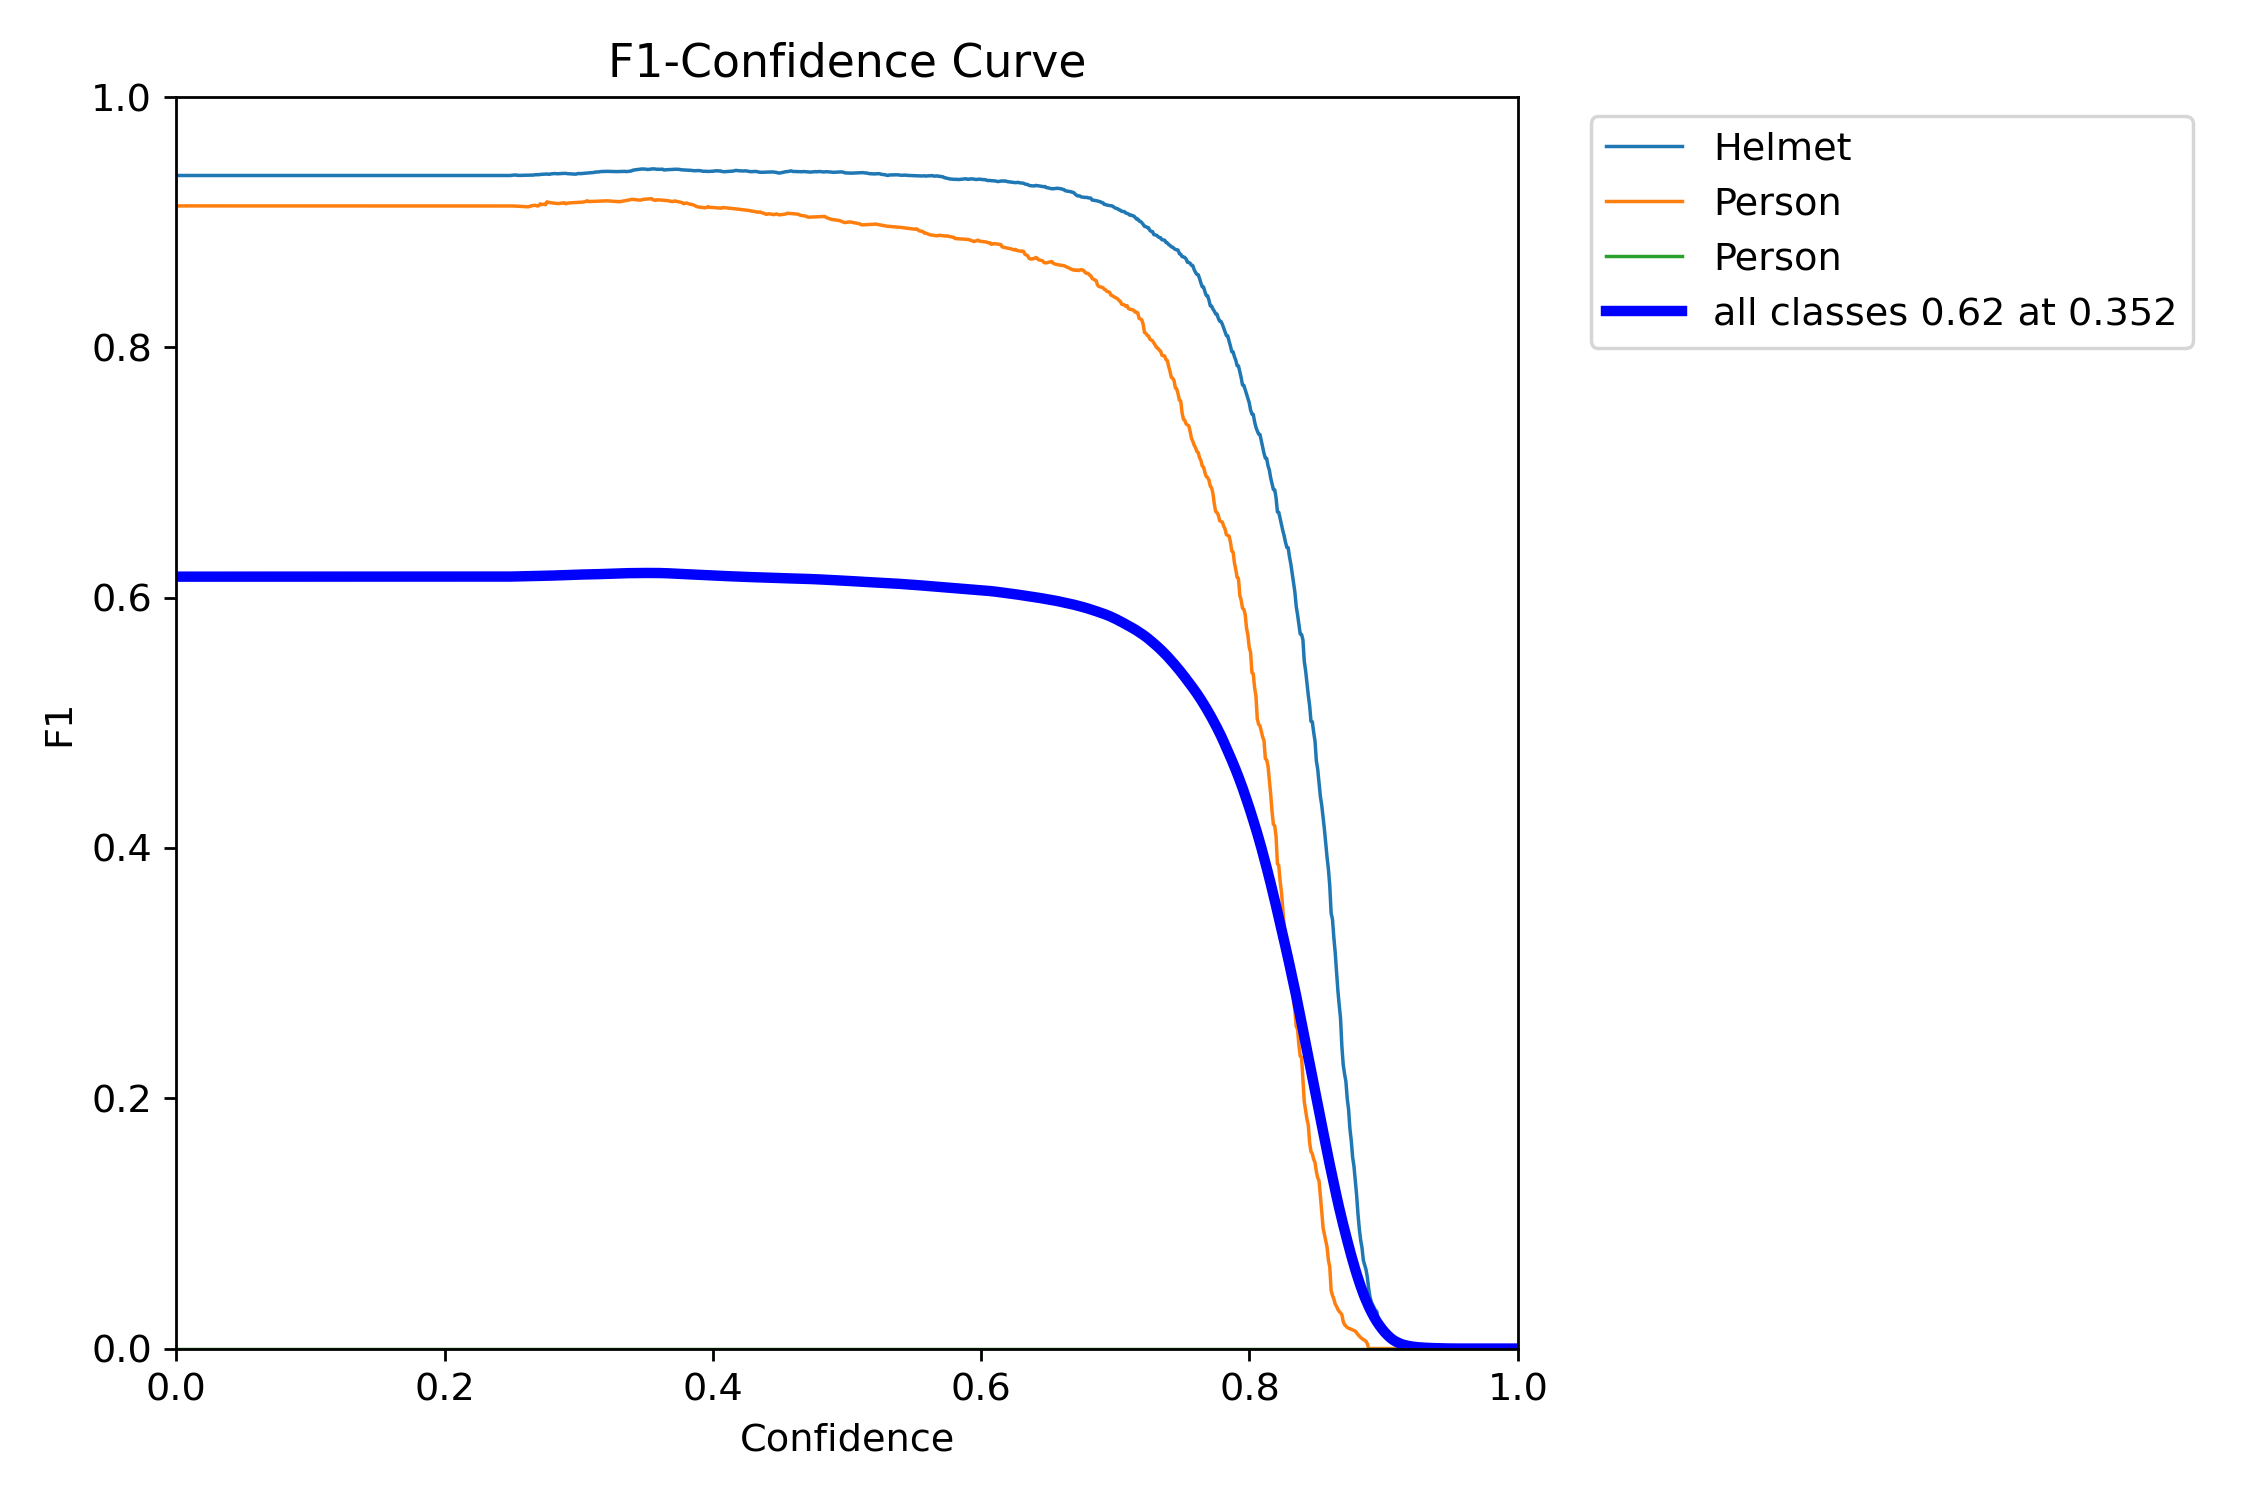

In [20]:
from IPython.display import Image, clear_output
Image(filename='/content/runs/detect/train/F1_curve.png', width=600)

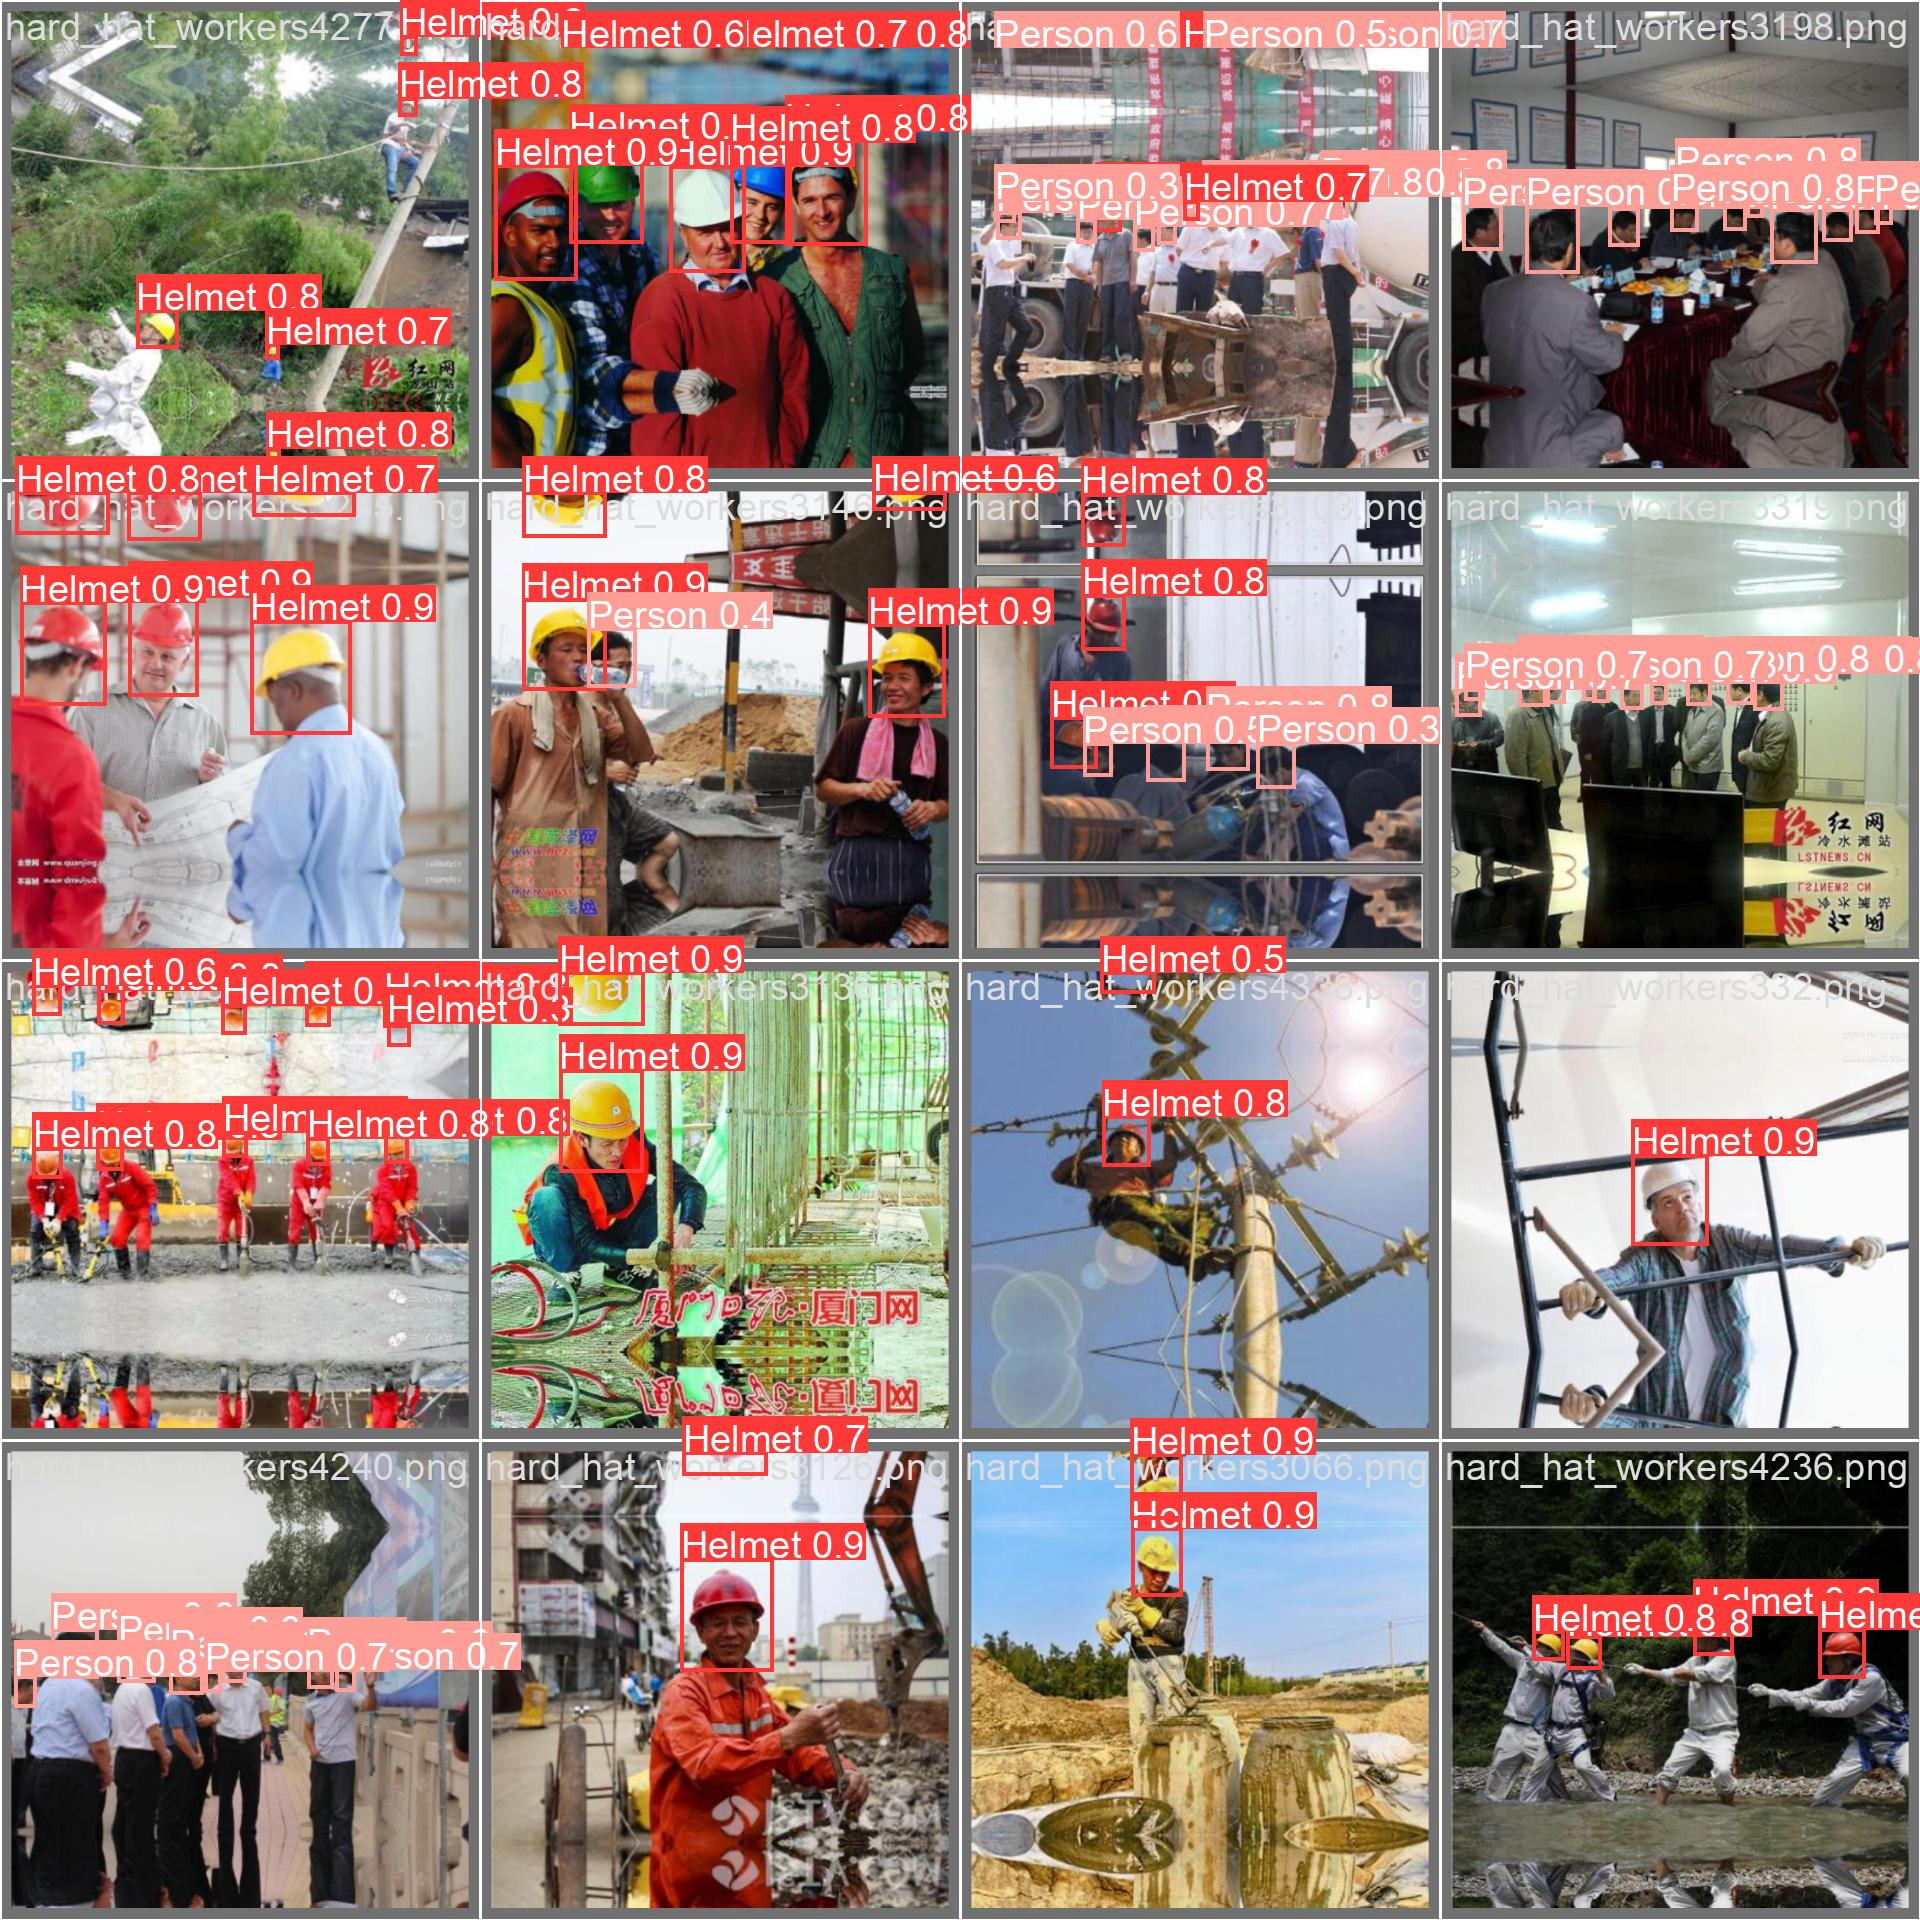

In [21]:
Image(filename='/content/runs/detect/train/val_batch2_pred.jpg', width=1000)

In [22]:
import plotly.express as px
import pandas as pd

df = pd.read_csv("/content/runs/detect/train/results.csv")
fig = px.line(df, x='                  epoch', y='       metrics/mAP50(B)', title='mAP50')
fig.show()

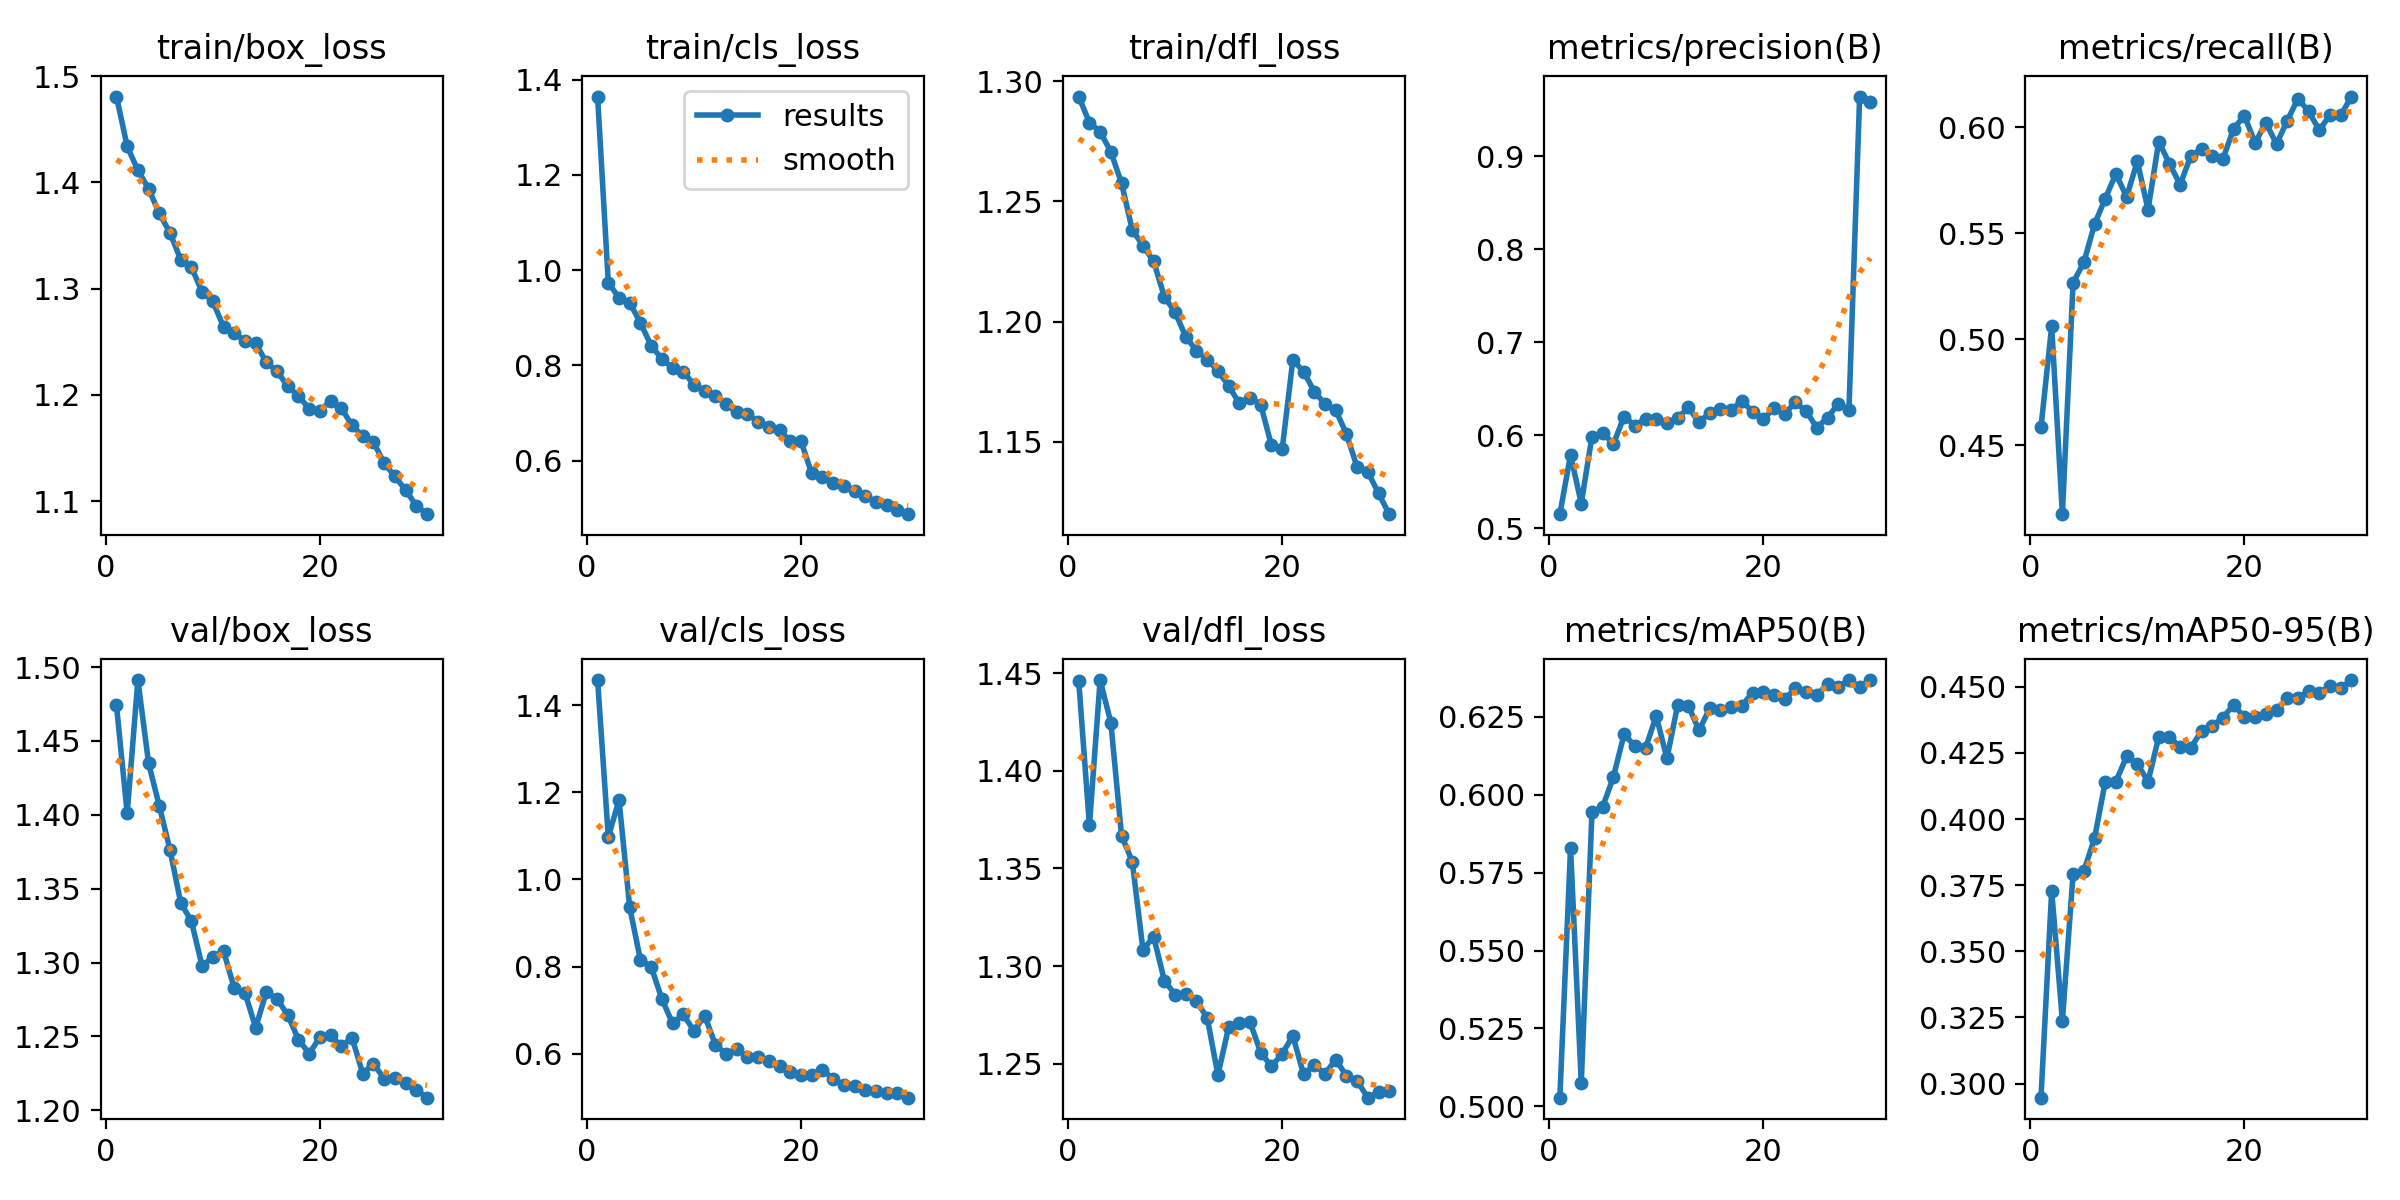

In [23]:
Image(filename='/content/runs/detect/train/results.png', width=1000)

##Performance Testset
(1 exemple)

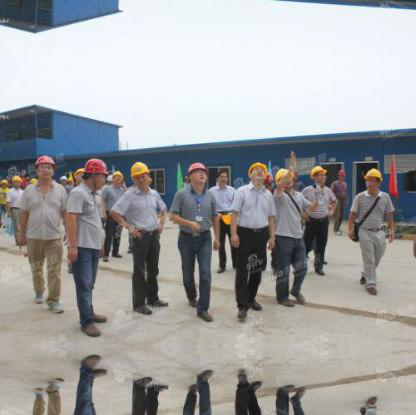

In [24]:
from google.colab.patches import cv2_imshow
import cv2
import copy
img_path = "/content/test/images/hard_hat_workers3625.png"
imgtestset = cv2.imread(img_path)
cv2_imshow(imgtestset)

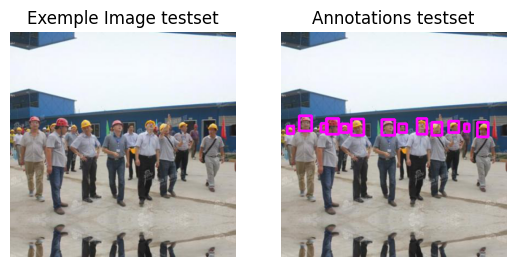

In [25]:
image_dir = "/content/test/images"
labels_dir = "/content/test/labels"


image_file_name = "hard_hat_workers3625.png"


image_path = os.path.join(image_dir, image_file_name)
label_file_name = os.path.splitext(image_file_name)[0] + ".txt"
label_path = os.path.join(labels_dir, label_file_name)



img = cv2.imread(image_path)
dh, dw, _ = img.shape


img_without_rectangles = copy.copy(img)


if os.path.exists(label_path):
    with open(label_path, 'r') as fl:
        data = fl.readlines()

    for dt in data:
        _, x, y, w, h = map(float, dt.split(' '))
        l = int((x - w / 2) * dw)
        r = int((x + w / 2) * dw)
        t = int((y - h / 2) * dh)
        b = int((y + h / 2) * dh)

        if l < 0:
            l = 0
        if r > dw - 1:
            r = dw - 1
        if t < 0:
            t = 0
        if b > dh - 1:
            b = dh - 1


        cv2.rectangle(img, (l, t), (r, b), (255, 0, 255), 3)


plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Annotations testset")
plt.axis('off')


plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img_without_rectangles, cv2.COLOR_BGR2RGB))
plt.title("Exemple Image testset")
plt.axis('off')


plt.show()

In [26]:
model = YOLO("/content/runs/detect/train/weights/best.pt")



img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

predictions = model.predict(imgtestset)
print(predictions)



0: 640x640 13 Helmets, 1 Person, 36.4ms
Speed: 2.3ms preprocess, 36.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)
[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'Helmet', 1: 'Person', 2: 'Person'}
orig_img: array([[[ 77,  62,  53],
        [ 78,  63,  54],
        [ 78,  63,  54],
        ...,
        [ 57,  51,  32],
        [ 57,  51,  32],
        [ 58,  52,  33]],

       [[ 77,  62,  53],
        [ 78,  63,  54],
        [ 79,  64,  55],
        ...,
        [ 67,  58,  45],
        [ 67,  58,  44],
        [ 66,  57,  44]],

       [[ 75,  61,  49],
        [ 77,  63,  51],
        [ 78,  64,  52],
        ...,
        [ 86,  71,  69],
        [ 85,  70,  67],
        [ 84,  69,  67]],

       ...,

       [[178, 189, 193],
        [191, 202, 206],
        [194, 205, 209],
        ...,
        [176, 182, 187],
        [176, 182, 187],
        [176, 182, 187]

In [27]:
for prediction in predictions:
    boxes = prediction.boxes.data.cpu().numpy()
    bbox = boxes[:, :].tolist()
    print(bbox)
print(len(bbox))

[[363.1654357910156, 166.67616271972656, 383.5501403808594, 192.5145263671875, 0.8421172499656677, 0.0], [33.57060623168945, 153.27719116210938, 56.964717864990234, 181.24703979492188, 0.835354208946228, 0.0], [186.0657196044922, 159.94171142578125, 209.64170837402344, 187.96359252929688, 0.8334248661994934, 0.0], [129.5864715576172, 159.85755920410156, 151.89768981933594, 189.0511474609375, 0.8276758193969727, 0.0], [247.35055541992188, 160.0540771484375, 268.63702392578125, 185.471923828125, 0.8229854702949524, 0.0], [83.50948333740234, 157.3193817138672, 108.38483428955078, 188.92503356933594, 0.8202129602432251, 0.0], [309.7396240234375, 164.19998168945312, 327.9521789550781, 185.00680541992188, 0.8068860173225403, 0.0], [274.71771240234375, 166.56594848632812, 293.46636962890625, 190.68798828125, 0.7857992649078369, 0.0], [215.86842346191406, 168.09120178222656, 230.9007110595703, 187.46694946289062, 0.6946828365325928, 1.0], [111.42633819580078, 168.93739318847656, 124.3514709472

In [28]:
def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='red', facecolor=(0,0,0,0), lw=2))

##PREDICTION YOLOV8

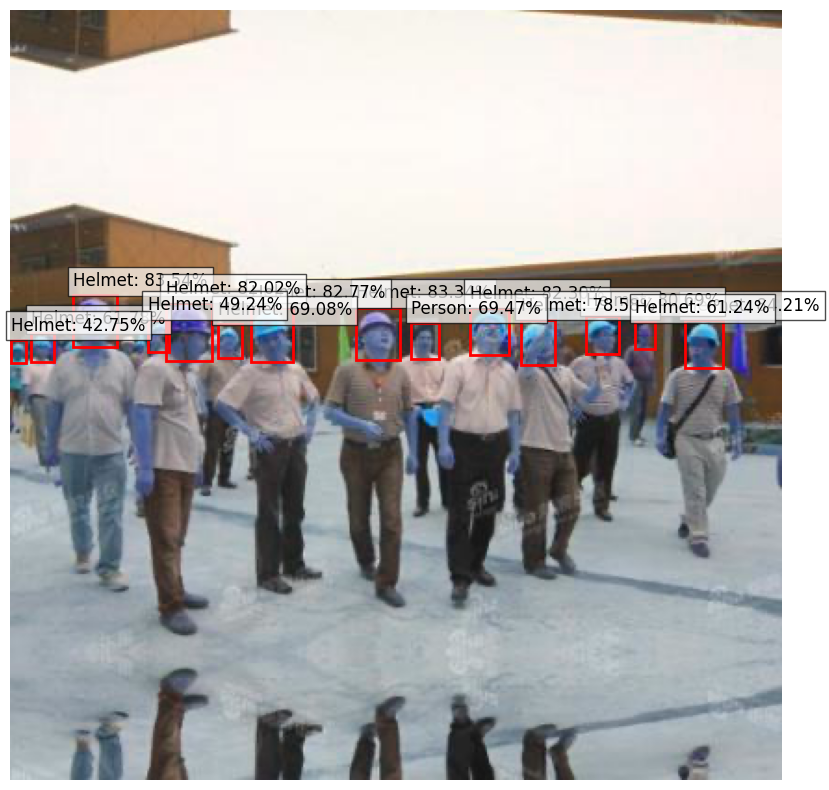

PREDICTION YOLOV8


In [29]:
import numpy as np

plt.figure(figsize=(10, 10))
plt.imshow(imgtestset)
for boxx in bbox:
    input_box = np.array(boxx)
    show_box(input_box, plt.gca())


    class_id = int(boxx[5])
    class_name = model.names[class_id]
    confidence = boxx[4] * 100


    text = f"{class_name}: {confidence:.2f}%"
    text_x = boxx[0]
    text_y = boxx[1] - 5
    plt.text(text_x, text_y, text, bbox=dict(facecolor='white', alpha=0.7), fontsize=12)

plt.axis('off')
plt.show()
print("PREDICTION YOLOV8")

##*Evaluation sur autre distribution d'images*
( 2 exemples)

Image 1 - shape : (1448, 1086)
Image 2 - shape : (500, 1000)


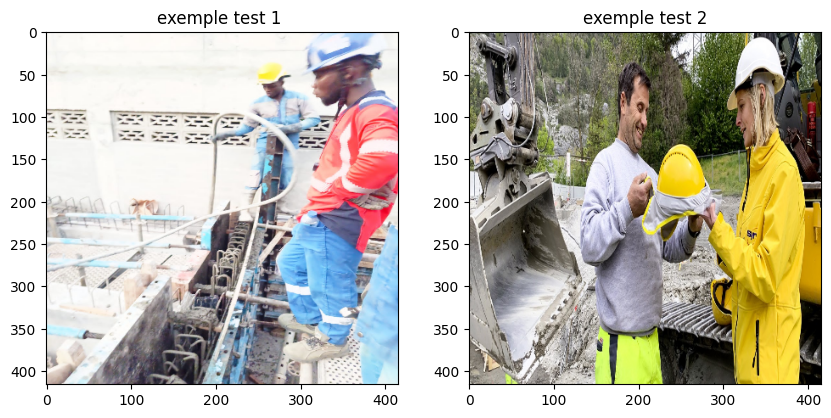

In [30]:
import matplotlib.pyplot as plt
model = YOLO("/content/runs/detect/train/weights/best.pt")
img_path1 = "/content/testperformance.jpg"
img_path2 = "/content/performancetest.jpeg"


img1 = cv2.imread(img_path1)
height1, width1, _ = img1.shape
print(f"Image 1 - shape : ({height1}, {width1})")
#cv2_imshow(img1)


img2 = cv2.imread(img_path2)
height2, width2, _ = img2.shape
print(f"Image 2 - shape : ({height2}, {width2})")
#cv2_imshow(img2)


# Redimensionner les images
resized_img1 = cv2.resize(img1, (416, 416))
resized_img2 = cv2.resize(img2, (416, 416))


plt.figure(figsize=(10, 5))


plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(resized_img1, cv2.COLOR_BGR2RGB))
plt.title("exemple test 1 ")
plt.axis('on')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(resized_img2, cv2.COLOR_BGR2RGB))
plt.title("exemple test 2")
plt.axis('on')


plt.show()

##Prediction Convaincante


0: 640x640 2 Helmets, 36.2ms
Speed: 2.4ms preprocess, 36.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)
[[298.40625, 0.12227172404527664, 406.4501037597656, 90.62374114990234, 0.8677153587341309, 0.0], [245.93870544433594, 30.259746551513672, 285.7876281738281, 79.33867645263672, 0.8383964896202087, 0.0]]


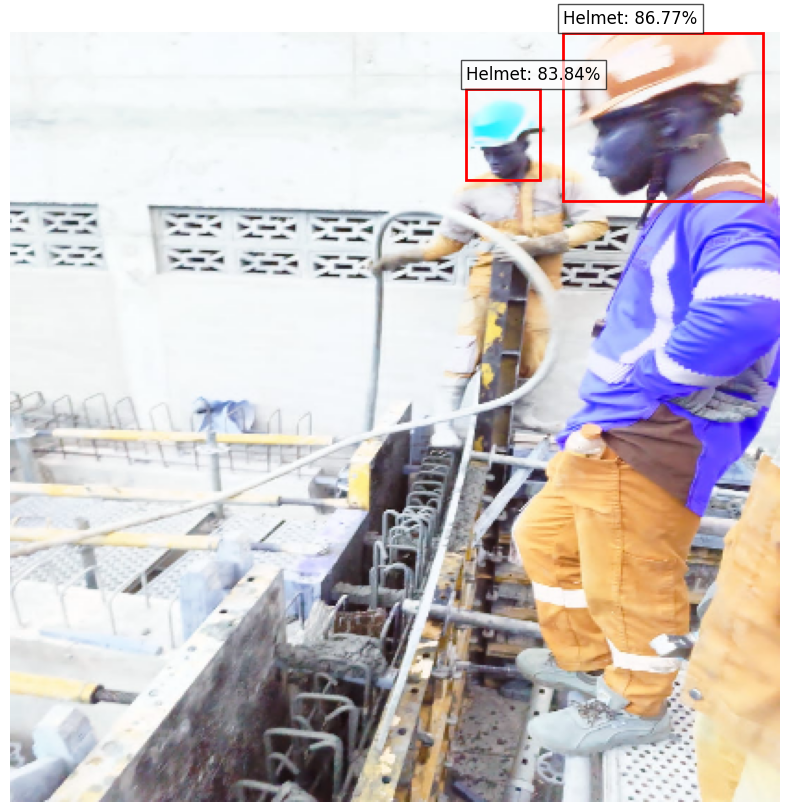

In [31]:
predictions = model.predict(resized_img1)
#print(predictions)
for prediction in predictions:
    boxes = prediction.boxes.data.cpu().numpy()
    bbox = boxes[:, :].tolist()
    print(bbox)
plt.figure(figsize=(10, 10))
plt.imshow(resized_img1)
for boxx in bbox:
    input_box = np.array(boxx)
    show_box(input_box, plt.gca())


    class_id = int(boxx[5])
    class_name = model.names[class_id]
    confidence = boxx[4] * 100


    text = f"{class_name}: {confidence:.2f}%"
    text_x = boxx[0]
    text_y = boxx[1] - 5
    plt.text(text_x, text_y, text, bbox=dict(facecolor='white', alpha=0.7), fontsize=12)

plt.axis('off')
plt.show()


0: 640x640 2 Helmets, 1 Person, 36.5ms
Speed: 3.3ms preprocess, 36.5ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)
[[294.2496643066406, 0.3203780949115753, 381.3182067871094, 140.54713439941406, 0.8056560754776001, 0.0], [216.04541015625, 128.17823791503906, 288.64581298828125, 223.838134765625, 0.6948137283325195, 0.0], [174.5804901123047, 27.779172897338867, 220.08303833007812, 144.9401397705078, 0.5608392357826233, 1.0]]


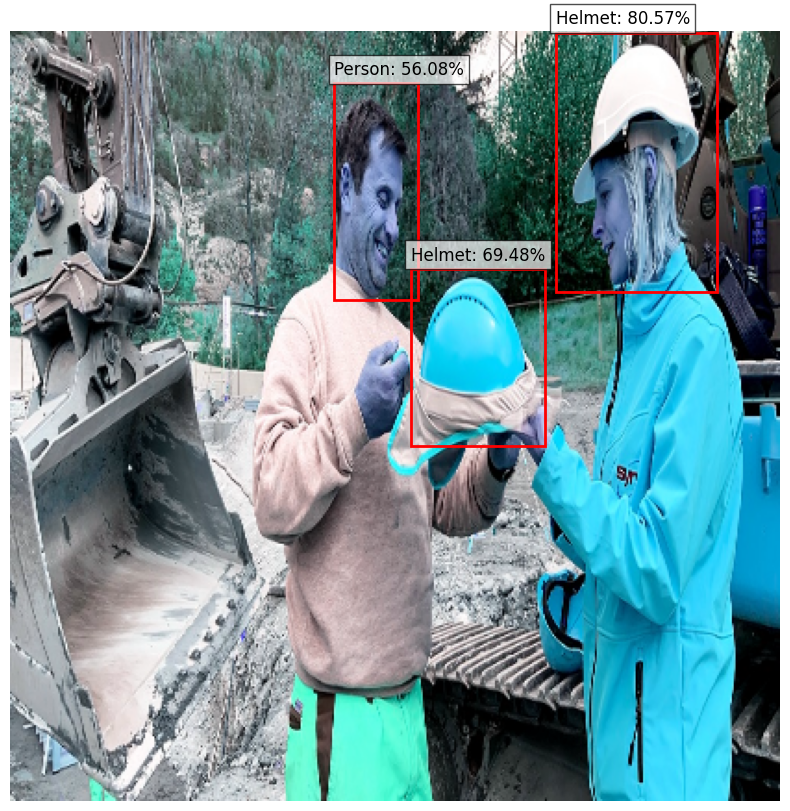

In [32]:
predictions = model.predict(resized_img2)

for prediction in predictions:
    boxes = prediction.boxes.data.cpu().numpy()
    bbox = boxes[:, :].tolist()
    print(bbox)
plt.figure(figsize=(10, 10))
plt.imshow(resized_img2)
for boxx in bbox:
    input_box = np.array(boxx)
    show_box(input_box, plt.gca())


    class_id = int(boxx[5])
    class_name = model.names[class_id]
    confidence = boxx[4] * 100


    text = f"{class_name}: {confidence:.2f}%"
    text_x = boxx[0]
    text_y = boxx[1] - 5
    plt.text(text_x, text_y, text, bbox=dict(facecolor='white', alpha=0.7), fontsize=12)

plt.axis('off')
plt.show()
#print(predictions)